<a href="https://colab.research.google.com/github/Fayasrx/CodSoft/blob/main/codsoft_task__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Fayasrx/CodSoft.git


Cloning into 'CodSoft'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 556.72 KiB | 4.42 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

imdb = pd.read_csv('/content/CodSoft/IMDb Movies India.csv', encoding='latin-1')
print(imdb.head())
imdb.isnull().sum()


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
imdb.shape

(15509, 10)

In [ ]:
imdb.duplicated().sum()

6


In [ ]:
imdb.dropna(inplace=True)
imdb.shape
imdb.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
imdb.columns
print(imdb['Year'])

1        (2019)
3        (2019)
5        (1997)
6        (2005)
8        (2012)
          ...  
15493    (2015)
15494    (2001)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 5659, dtype: object


In [ ]:
imdb['Year'] = imdb['Year'].astype(str)
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True).astype(int)
print((imdb['Year']))
imdb.shape

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int64


(5659, 10)

In [ ]:
print(imdb['Duration'])

1        109 min
3        110 min
5        147 min
6        142 min
8         82 min
          ...   
15493    115 min
15494    153 min
15503    125 min
15505    129 min
15508    130 min
Name: Duration, Length: 5659, dtype: object


In [ ]:
imdb['Duration']=imdb['Duration'].astype(str)
imdb['Duration'] = pd.to_numeric(imdb['Duration'].str.replace('min',''))
imdb['Duration']=imdb['Duration'].astype(int)
print(imdb['Duration'])

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int64


In [ ]:
imdb['Genre'] = imdb['Genre'].str.split(', ')

imdb = imdb.explode('Genre')

imdb['Genre'].fillna(imdb['Genre'].mode() [0], inplace=True)
print(imdb['Genre'])

1          Drama
3         Comedy
3        Romance
5         Comedy
5          Drama
          ...   
15503      Drama
15505     Action
15505      Drama
15508     Action
15508      Drama
Name: Genre, Length: 11979, dtype: object


In [ ]:
print(imdb['Votes'])

1          8
3         35
3         35
5        827
5        827
        ... 
15503     44
15505    655
15505    655
15508     20
15508     20
Name: Votes, Length: 11979, dtype: object


In [ ]:
imdb['Votes'] = imdb['Votes'].astype(str)

imdb['Votes'] = imdb['Votes'].str.replace(',', '').astype(int)
print(imdb['Votes'])

1          8
3         35
3         35
5        827
5        827
        ... 
15503     44
15505    655
15505    655
15508     20
15508     20
Name: Votes, Length: 11979, dtype: int64


In [ ]:
imdb.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


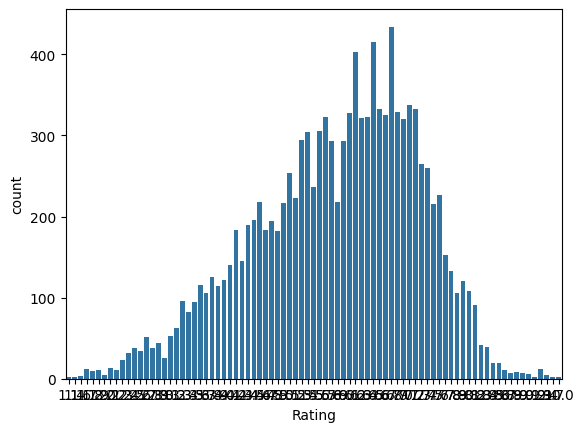

In [ ]:
sns.countplot(x='Rating',data=imdb)
plt.show()

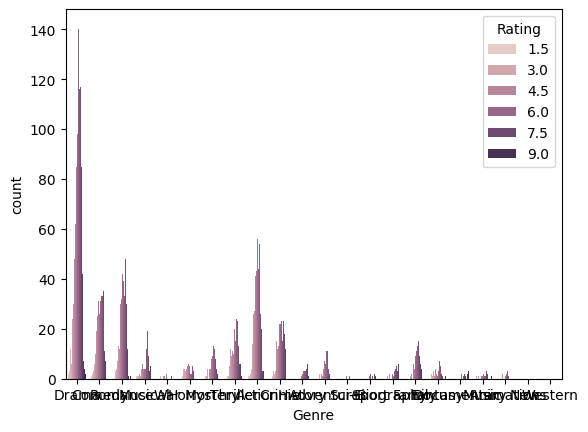

In [ ]:
sns.countplot(x='Genre',hue='Rating',data=imdb)
plt.show()

In [ ]:
rating=px.histogram(imdb,x='Rating',color='Genre',barmode='group')
rating.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
imdb.drop("Name", axis=1, inplace=True)

In [ ]:
genre_mean_rating= imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating']= genre_mean_rating

In [ ]:
director_mean_rating = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb.groupby('Actor 1')['Rating'].transform('mean')
imdb['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb.groupby('Actor 2')['Rating'].transform('mean')

imdb['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating=imdb.groupby('Actor 3')['Rating'].transform('mean')

imdb['Actor3_encoded']=actor3_mean_rating

In [ ]:
x = imdb[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']] # Use a list to select multiple columns
y = imdb['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

Model = LinearRegression()

Model.fit(X_train,y_train)

Model_pred = Model.predict(X_test)

In [ ]:
print('The performance evaluation of Logistic Regression is below: ', '\n')

print('Mean squared error: ', mean_squared_error(y_test, Model_pred))

print('Mean absolute error:', mean_absolute_error(y_test, Model_pred))

print('R2 score:',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error: 0.4921902540765641
R2 score: 0.7641133663863862
